<a href="https://colab.research.google.com/github/waghvaishnav/Advanced-Ensemble-Learning-and-Models-Analysis-Techniques-Playground./blob/main/Gradient_Boosting_Regression_Ensemle_Learning_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving ad_spend gdboostregressor.csv to ad_spend gdboostregressor.csv


{'ad_spend gdboostregressor.csv': b'Ad Spend ($),Season,Revenue ($)\r\n463,Monsoon,440\r\n158,Winter,297\r\n328,Monsoon,214\r\n322,Monsoon,48\r\n726,Winter,1048\r\n741,Winter,1125\r\n233,Monsoon,186\r\n997,Summer,1273\r\n340,Monsoon,465\r\n978,Monsoon,824\r\n469,Monsoon,432\r\n129,Monsoon,118\r\n410,Winter,733\r\n670,Monsoon,589\r\n712,Summer,930\r\n577,Winter,1047\r\n503,Summer,626\r\n597,Summer,690\r\n633,Summer,804\r\n172,Summer,320\r\n432,Winter,699\r\n317,Winter,582\r\n822,Summer,920\r\n523,Summer,541\r\n985,Winter,1423\r\n458,Winter,561\r\n834,Winter,1263\r\n818,Monsoon,611\r\n235,Monsoon,311\r\n557,Monsoon,316\r\n726,Summer,1026\r\n872,Monsoon,599\r\n393,Summer,348\r\n298,Summer,275\r\n740,Monsoon,787\r\n828,Summer,990\r\n413,Monsoon,383\r\n186,Monsoon,130\r\n946,Winter,1410\r\n457,Monsoon,315\r\n565,Winter,854\r\n853,Monsoon,732\r\n708,Monsoon,734\r\n761,Winter,955\r\n288,Winter,593\r\n587,Monsoon,522\r\n726,Summer,834\r\n305,Winter,403\r\n257,Summer,413\r\n983,Summer,1203\r\n5

In [ ]:
data = pd.read_csv("ad_spend gdboostregressor.csv")
df = pd.DataFrame(data)

df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [ ]:
dt = df.groupby("Season")[["Ad Spend ($)","Revenue ($)"]].mean()
dt

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


<Axes: xlabel='Season'>

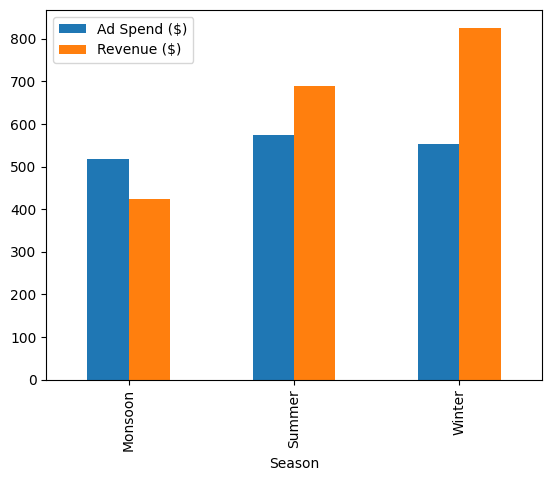

In [ ]:

dt.plot(kind="bar")


In [ ]:
# feature encoding :

df_encoded = pd.get_dummies(df,columns=["Season"],drop_first=True)
df_encoded.astype(int)

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,0,0
1,158,297,0,1
2,328,214,0,0
3,322,48,0,0
4,726,1048,0,1
...,...,...,...,...
195,407,609,1,0
196,182,183,0,0
197,184,10,0,0
198,380,504,1,0


In [ ]:
# train_test_split :
from sklearn.model_selection import train_test_split

x = df_encoded[["Ad Spend ($)","Season_Summer","Season_Winter"]]
y = df_encoded['Revenue ($)']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)


In [ ]:
#training Decisiontree regression model :

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

dt_model.fit(x_train,y_train)
dt_model.score(x_test,y_test)

0.8354902585133208

In [ ]:
# Training Gradient Regression Model :

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gd_reg = GradientBoostingRegressor(estimator=,n_estimators=54,learning_rate=0.09,loss="squared_error",max_depth=3)

gd_reg.fit(x_train,y_train)
gd_reg.score(x_test,y_test)

y_prediction = gd_reg.predict(x_test)

print("the accuracy  score of the model is : ",gd_reg.score(x_test,y_test), " %")

the accuracy  score of the model is :  0.895933737934541  %
